# Installing and Loading packages
Get the model url at Spacy's web page

In [1]:
%%bash
pip install -q scispacy
pip install -q <model-url>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.6/500.6 MB 3.3 MB/s eta 0:00:00


In [10]:
import numpy as np 
import pandas as pd

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import scispacy
import spacy
import en_core_sci_lg

from scipy.spatial.distance import jensenshannon

import joblib

from IPython.display import HTML, display

from ipywidgets import interact, Layout, HBox, VBox, Box
import ipywidgets as widgets
from IPython.display import clear_output

from tqdm import tqdm
from os.path import isfile

import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [37]:
# setting matplolib figure properties
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = [10,6]

# Connecting to google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading dataset from Kaggl
You can get this dataset [here](https://www.kaggle.com/code/danielwolffram/cord-19-create-dataframe/data).

In [ ]:
%%bash
wget https://www.kaggleusercontent.com/kf/33133298/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..Wgyrw6Q4qi0QomV7rgO-KA.F8jDeZzx-sPJ45hM9FbPbHbr-XqwfU1dbbj0xTp8Cwk1tjH6Dvi0sXolgTsU4dlqK_0qiYJ0FRmhb0ZglLheaF-8g6p-ZgAYIPb8TRskikvmUnQgFbTx2SG0wdWFGepzSltUrS0FjgkkdOVroWgC-OQiOGewElVoyaKE5UJyOfwwT74dOjZC1mfp-TkFpmjHtyYubhR8ewYUDokjVdKRY5oufP7ackm__Yct7pndxoneKWJ0fIq6Om7QB6a4nKGUL1wHIwBrOYI8i35xjnavddGLMJojSEz7GnnfyfB62BnbhQwDo7dmnoH1bf0dy_J3d4FmXtetOaSRjDbYgOaeZGZtMJ0q83RWsdp-pk_1GiGZ11DLzt3vlr14vW864-pKaOi2Tv6Xi7s79qqcVhyDV_YKj9En3wxI7YMaOsxTJKcL51YBI_KEHJVMugoCBRapZIaualBGUgLOjESVQ5Ca6lS_X12NAtU-jhxkWbXaCaEVjDZQbj4zpyqUKGwgWfB8-Uq5VtPv_tNktRpuPoXdZ89WAMq-ha9ZEcX3GYhskxSy0H_3cmv-vE32DMsf9MefWyiFwuacO4BKI4n38ei79DjcQ0IEsGb12Mr38e7v9Q_7iAZZZKKg0m11_D6d6fRyEj7aBWq1P6XoXKp5cubX2o-47u-qCtM8tCANcWmiy0k.jESx2eSZVnEOuRZbS6oLpg/cord19_df.csv

# Load and Prepare the Data

In [6]:
df = pd.read_csv('cord19_df.csv')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,paper_id,body_text,methods,results,source,title,doi,abstract,publish_time,authors,journal,arxiv_id,url,publish_year,is_covid19,study_design
0,3cdc48bb9e40afd30a59463b7872761a726998c8,NDV (Roakin strain) was obtained from Dr. D. J...,NDV (Roakin strain) was obtained from Dr. D. J...,Adult house flies harbored Newcastle Disease v...,PMC,Experimental Evaluation of Musca domestica (Di...,10.1093/jmedent/44.4.666,"House flies, Musca domestica L. (Diptera: Musc...",2007-07-01,"Watson, D. Wes; Niño, Elina L.; Rochon, Katery...",J Med Entomol,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,2007,False,[]
1,d99acb4e99be7852aa61a688c9fbd38d44b5a252,Live attenuated viruses have been developed an...,RSV A2 strain was obtained from ATCC (Manassas...,The reverse genetics system for measles Edmons...,PMC,Evaluation of Measles Vaccine Virus as a Vecto...,10.2174/1874357901206010012,Live attenuated recombinant measles vaccine vi...,2012-02-16,"Mok, Hoyin; Cheng, Xing; Xu, Qi; Zengel, James...",Open Virol J,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2012,False,"['truncated', 'gamma', 'protocol']"
2,748d4c57fe1acc8d9d97cf574f7dea5296f9386c,Ebola virus (EBOV) and other members of the fa...,U2OS human osteosarcoma cells were cultured in...,For evaluating EBOV GP triggering under biosaf...,PMC,Direct Visualization of Ebola Virus Fusion Tri...,10.1128/mbio.01857-15,Ebola virus (EBOV) makes extensive and intrica...,2016-02-09,"Spence, Jennifer S.; Krause, Tyler B.; Mittler...",mBio,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,2016,False,"['truncated', 'heterogeneity']"
3,b891efc6e1419713b05ff7d89b26d260478c28df,To the Editor:\nChina has the world's second l...,NaN,NaN,PMC,Tuberculosis prevention in healthcare workers ...,10.1183/23120541.00015-2015,BSL3 and respiratory isolation wards protect h...,2015-08-21,"Deng, Yunfeng; Li, Yan; Wang, Fengtian; Gao, D...",ERJ Open Res,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2015,False,[]
4,353852971069ad5794445e5c1ab6077ce23da75d,Coronavirus disease 2019 (COVID-19) has spread...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,True,[]


In [7]:
# Getting the article's body
all_texts = df.body_text

In [8]:
# taking a glimpse at some example
all_texts[0][:500]

"NDV (Roakin strain) was obtained from Dr. D. J. King, Southeast Poultry Research Laboratory, Athens, GA. The virus was propagated by inoculation of 10-d-old embryonated chicken eggs by the allantoic route, 0.1 ml per egg (SPAFAS, Charles River Laboratories Inc., Wilmington, MA). Allantoic fluid was harvested from eggs that died 3–4 d postinoculation. Titration of the virus was accomplished by preparation of 10-fold dilutions of allantoic fluid in Dulbecco's minimal essential medium (DMEM) and in"

# Latent Dirichlet Allocation
For preprocessing we use [scispaCy](https://allenai.github.io/scispacy/), which is a Python package containing [spaCy](https://spacy.io) models for processing biomedical, scientific or clinical text.

In [11]:
nlp = en_core_sci_lg.load(disable=['tagger','parser','ner'])
nlp.max_length = 3000000

In [12]:
# defining a custom tokenizer
def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_punct or word.is_space or len(word) == 1)]

In [13]:
# adding custom stop words
customize_stop_words = [
    'doi', 'preprint', 'copyright', 'org', 'https', 'et', 'al', 'author', 'figure', 'table',
    'rights', 'reserved', 'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI',
    '-PRON-', 'usually',
    r'\usepackage{amsbsy', r'\usepackage{amsfonts', r'\usepackage{mathrsfs', r'\usepackage{amssymb', r'\usepackage{wasysym',
    r'\setlength{\oddsidemargin}{-69pt',  r'\usepackage{upgreek', r'\documentclass[12pt]{minimal'
]

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [15]:
# Just uncomment if you want to train the models from skratch

# vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)
# data_vectorized = vectorizer.fit_transform(tqdm(all_texts))
vectorizer = joblib.load('vectorizer.csv')
data_vectorized = joblib.load('data_vectorized.csv')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [21]:
# Creating a dataframe from word frequencies
word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'count':np.asarray(data_vectorized.sum(axis=0))[0]})
word_count.sample(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
513770,viralebacterial,5
264505,interscapular,63
530209,z-band,6
369104,p40/p19,2
240172,horizontal,3935
463738,ssc/0.05,2
120658,cd41a,18
453367,signicant,2
486486,tikva,12
408550,ptlv-1,8


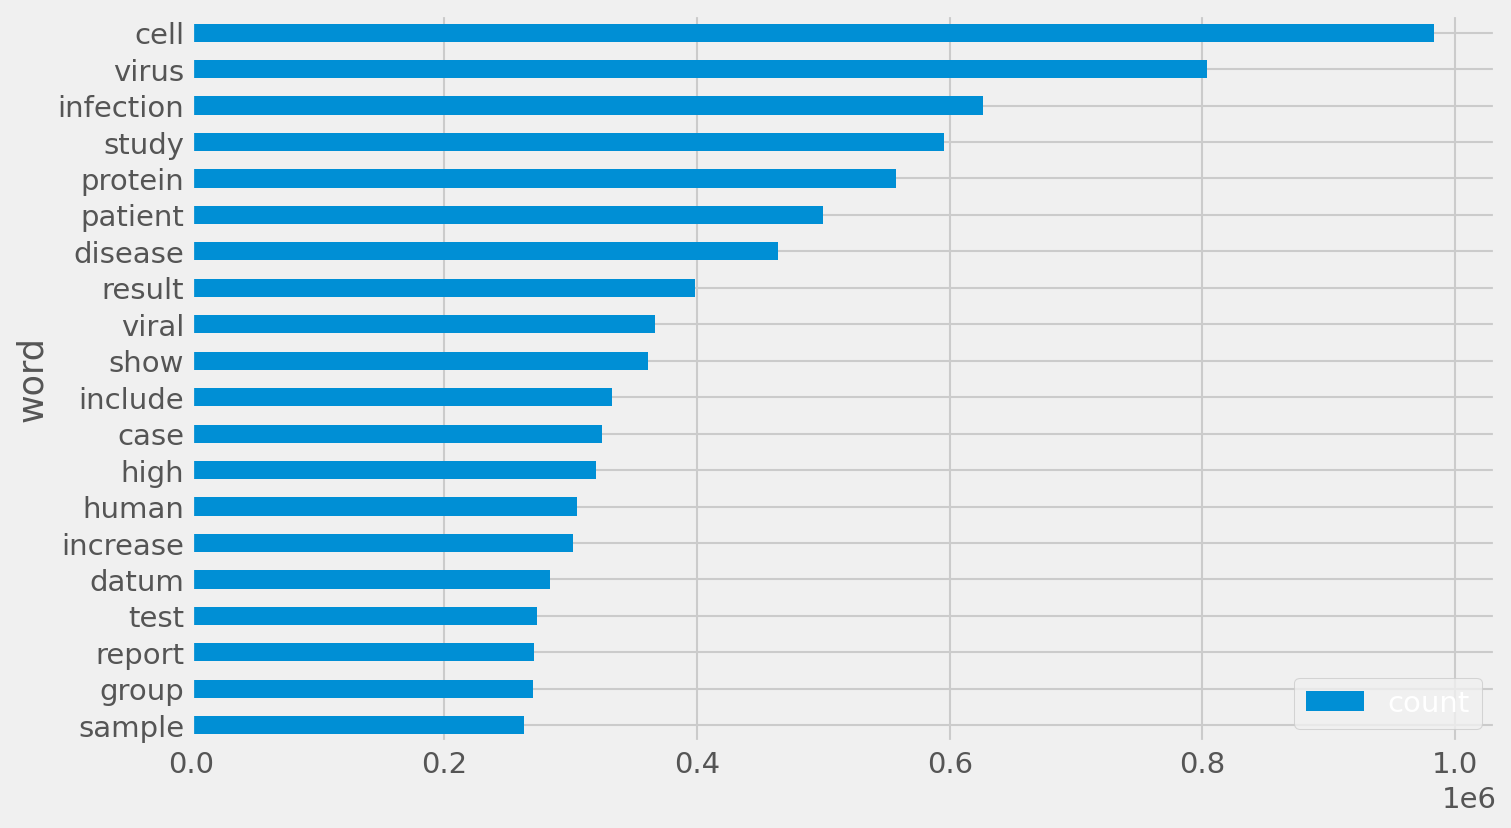

In [38]:
word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')

In [41]:
# Uncomment if you want to train the data from skratch
#lda = LatentDirichletAllocation(n_components=50, random_state=0)
#lda.fit(data_vectorized)
lda = joblib.load('lda.csv')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LatentDirichletAllocation from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Discovered Topics

In [42]:
def print_top_words(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [43]:
print_top_words(lda, vectorizer, n_top_words=25)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic #0: protease peptide inhibitor activity cleavage enzyme fusion site cleave cathepsin substrate inhibit show cell amino acid cysteine sars-cov inhibition serine proteolytic residue protein coronavirus active

Topic #1: sequence genome gene virus read sample viral analysis region dna identify nucleotide species alignment site human acid rna datum phylogenetic genomic method base length tree

Topic #2: blood donor test transfusion study cf plasma patient sample result platelet antibody cell unit group product positive fiv screen donation perform time antigen increase high

Topic #3: viral cell virus protein infection ifn antiviral target response signal replication type activity pathway inhibit rna expression gene host activation study sirna immune induce show

Topic #4: bind antibody cell peptide epitope target protein receptor human surface antigen molecule affinity acid lectin neutralize mabs phage specific structure high interaction display sequence different

Topic #5: disease

### Each article is a mixture of topics / a distribution over topics


In [45]:
if not (isfile('doc_topic_dist.csv')):
        print('File not there: generating')
        doc_topic_dist = pd.DataFrame(lda.transform(data_vectorized))
        doc_topic_dist.to_csv('doc_topic_dist.csv', index=False)
else:
        doc_topic_dist = pd.read_csv('doc_topic_dist.csv')  

In [46]:
doc_topic_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.322831,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.009759,0.000014,0.201816
1,0.000007,0.068827,0.000007,0.000007,0.000007,0.000007,0.029520,0.035590,0.000007,0.000007,...,0.000007,0.051670,0.000007,0.000007,0.000007,0.000007,0.000007,0.061351,0.000007,0.319316
2,0.042444,0.015515,0.000007,0.000007,0.030645,0.000007,0.000007,0.000007,0.150879,0.012120,...,0.000007,0.011243,0.002008,0.000007,0.000007,0.000007,0.000007,0.001363,0.000007,0.000007
3,0.000031,0.000031,0.093911,0.000031,0.000031,0.000031,0.013272,0.000031,0.000031,0.000031,...,0.000031,0.000031,0.000031,0.003760,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031
4,0.000038,0.011904,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.241437,0.000038,0.000038,0.000038


# Get Nearest Papers (in Topic Space)


In [48]:
is_covid19_article = df.body_text.str.contains('COVID-19|SARS-CoV-2|2019-nCov|SARS Coronavirus 2|2019 Novel Coronavirus')

In [49]:
def get_k_nearest_docs(doc_dist, k=5, lower=1950, upper=2020, only_covid19=False, get_dist=False):
    '''
    doc_dist: topic distribution (sums to 1) of one article
    
    Returns the index of the k nearest articles (as by Jensen–Shannon divergence in topic space). 
    '''
    
    relevant_time = df.publish_year.between(lower, upper)
    
    if only_covid19:
        temp = doc_topic_dist[relevant_time & is_covid19_article]
        
    else:
        temp = doc_topic_dist[relevant_time]
         
    distances = temp.apply(lambda x: jensenshannon(x, doc_dist), axis=1)
    k_nearest = distances[distances != 0].nsmallest(n=k).index
    
    if get_dist:
        k_distances = distances[distances != 0].nsmallest(n=k)
        return k_nearest, k_distances
    else:
        return k_nearest

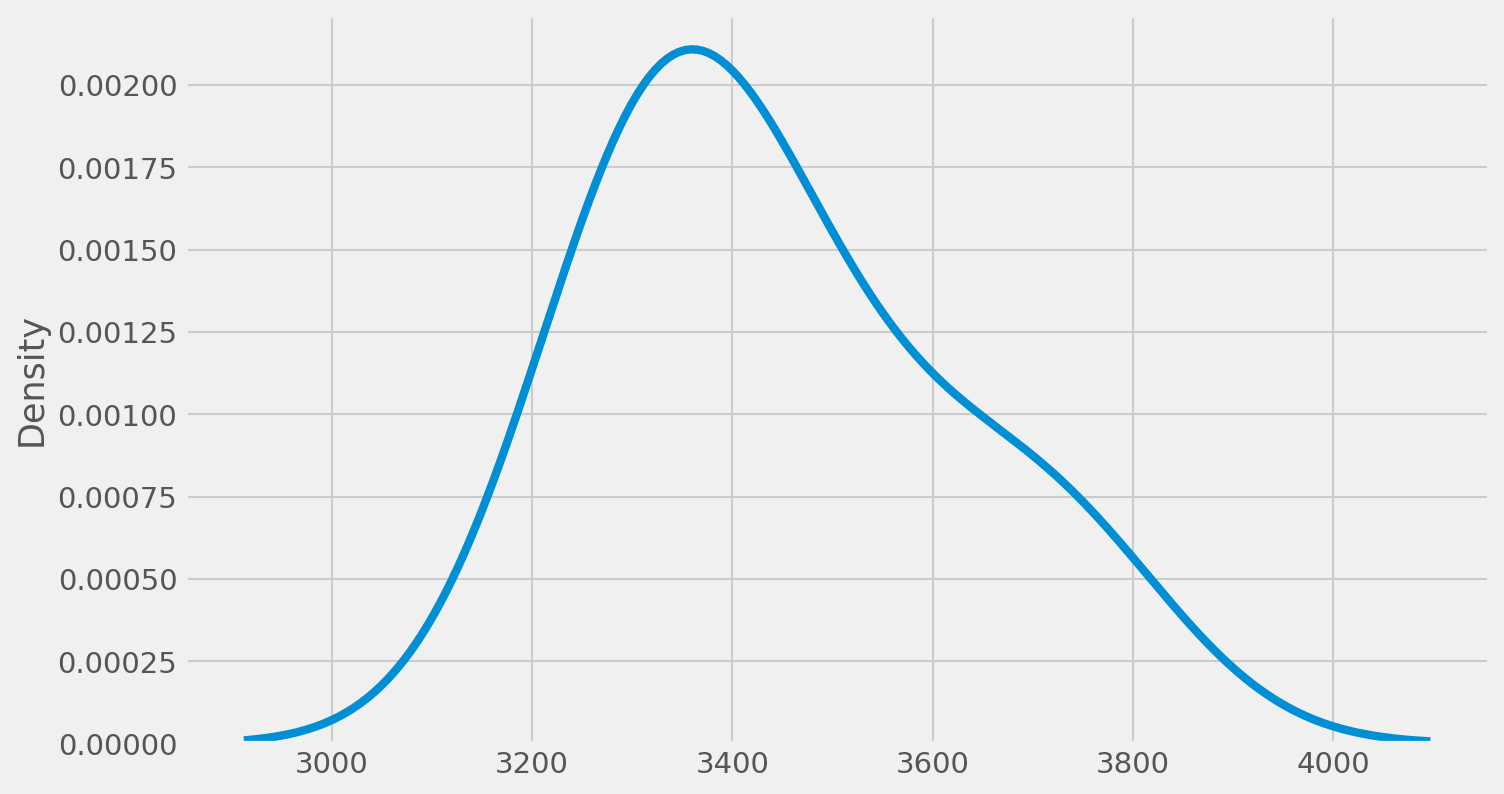

In [50]:
d = get_k_nearest_docs(doc_topic_dist[df.paper_id == '90b5ecf991032f3918ad43b252e17d1171b4ea63'].iloc[0])

sb.kdeplot(d)

In [53]:
# original Article
df[df.paper_id == '90b5ecf991032f3918ad43b252e17d1171b4ea63']

,paper_id,body_text,methods,results,source,title,doi,abstract,publish_time,authors,journal,arxiv_id,url,publish_year,is_covid19,study_design
4053,90b5ecf991032f3918ad43b252e17d1171b4ea63,"Since December 2019, an increasing number of p...","Epidemiological data. To conduct our analysis,...",Reproductive number proxy. Our estimates of R ...,medrxiv,The role of absolute humidity on transmission ...,10.1101/2020.02.12.20022467,A novel coronavirus (COVID-19) was identified ...,2020-02-17,Wei Luo; Maimuna S Majumder; Dianbo Liu; Canel...,NaN,NaN,https://doi.org/10.1101/2020.02.12.20022467,2020,True,"['time series analysis', 'estimation', 'associ..."


In [54]:
# nearest neighbors
df.iloc[d,:]

,paper_id,body_text,methods,results,source,title,doi,abstract,publish_time,authors,journal,arxiv_id,url,publish_year,is_covid19,study_design
3291,15ba463df9c6f382b8bff4561b5c84617d1f7159,"Abstract: Environmental factors, including sea...",NaN,Covid-19 growth rates showed high variability ...,medrxiv,Climate affects global patterns of COVID-19 ea...,10.1101/2020.03.23.20040501,"Environmental factors, including seasonal clim...",2020-03-27,Gentile Francesco Ficetola; Diego Rubolini,NaN,NaN,https://doi.org/10.1101/2020.03.23.20040501,2020,True,[]
3718,993a9b572dd0a0052a07fd7850ade2e1c7debb0c,"In late 2019, a novel virus strain from the fa...",NaN,We find robust statistical evidence that highe...,medrxiv,Causal empirical estimates suggest COVID-19 tr...,10.1101/2020.03.26.20044420,Nearly every country is now combating the 2019...,2020-03-30,Tamma Carleton; Kyle C. Meng,NaN,NaN,https://doi.org/10.1101/2020.03.26.20044420,2020,True,['time series analysis']
3356,e9e27abe482c8949d0edbd0bbd9702c1ce355dd8,"In infectious outbreak situations, much epidem...",This assessment is based on the open-access CO...,"A total of 18,069 confirmed cases were reporte...",medrxiv,Eco-epidemiological assessment of the COVID-19...,10.1101/2020.03.29.20046565,Background: The outbreak of COVID-19 in China ...,2020-03-31,Peter Byass,NaN,NaN,https://doi.org/10.1101/2020.03.29.20046565,2020,True,"['incidence', 'association']"
3344,4325758a40577153cfaf94c71440c391f684c657,COVID-19 is an infectious respiratory disease ...,The trajectory of expansion of SARS-CoV-2 in d...,"For data analysis, it was analysed daily data ...",medrxiv,REGIONAL DETERMINANTS OF THE EXPANSION OF COVI...,10.1101/2020.04.13.20063925,Objective: This study investigates the regiona...,2020-04-17,Waldecy Rodrigues; David Nadler Prata; Wainest...,NaN,NaN,https://doi.org/10.1101/2020.04.13.20063925,2020,True,"['time series analysis', 'p-value']"
3516,654b4d8ff2b5e2fa32cec57fd4afcd67212236f3,The first reported cases of people showing ser...,NaN,NaN,medrxiv,"The dynamics of Covid-19: weather, demographic...",10.1101/2020.04.21.20074450,We study the effects of three types of variabl...,2020-04-27,Renato H.L. Pedrosa,NaN,NaN,https://doi.org/10.1101/2020.04.21.20074450,2020,True,['association']


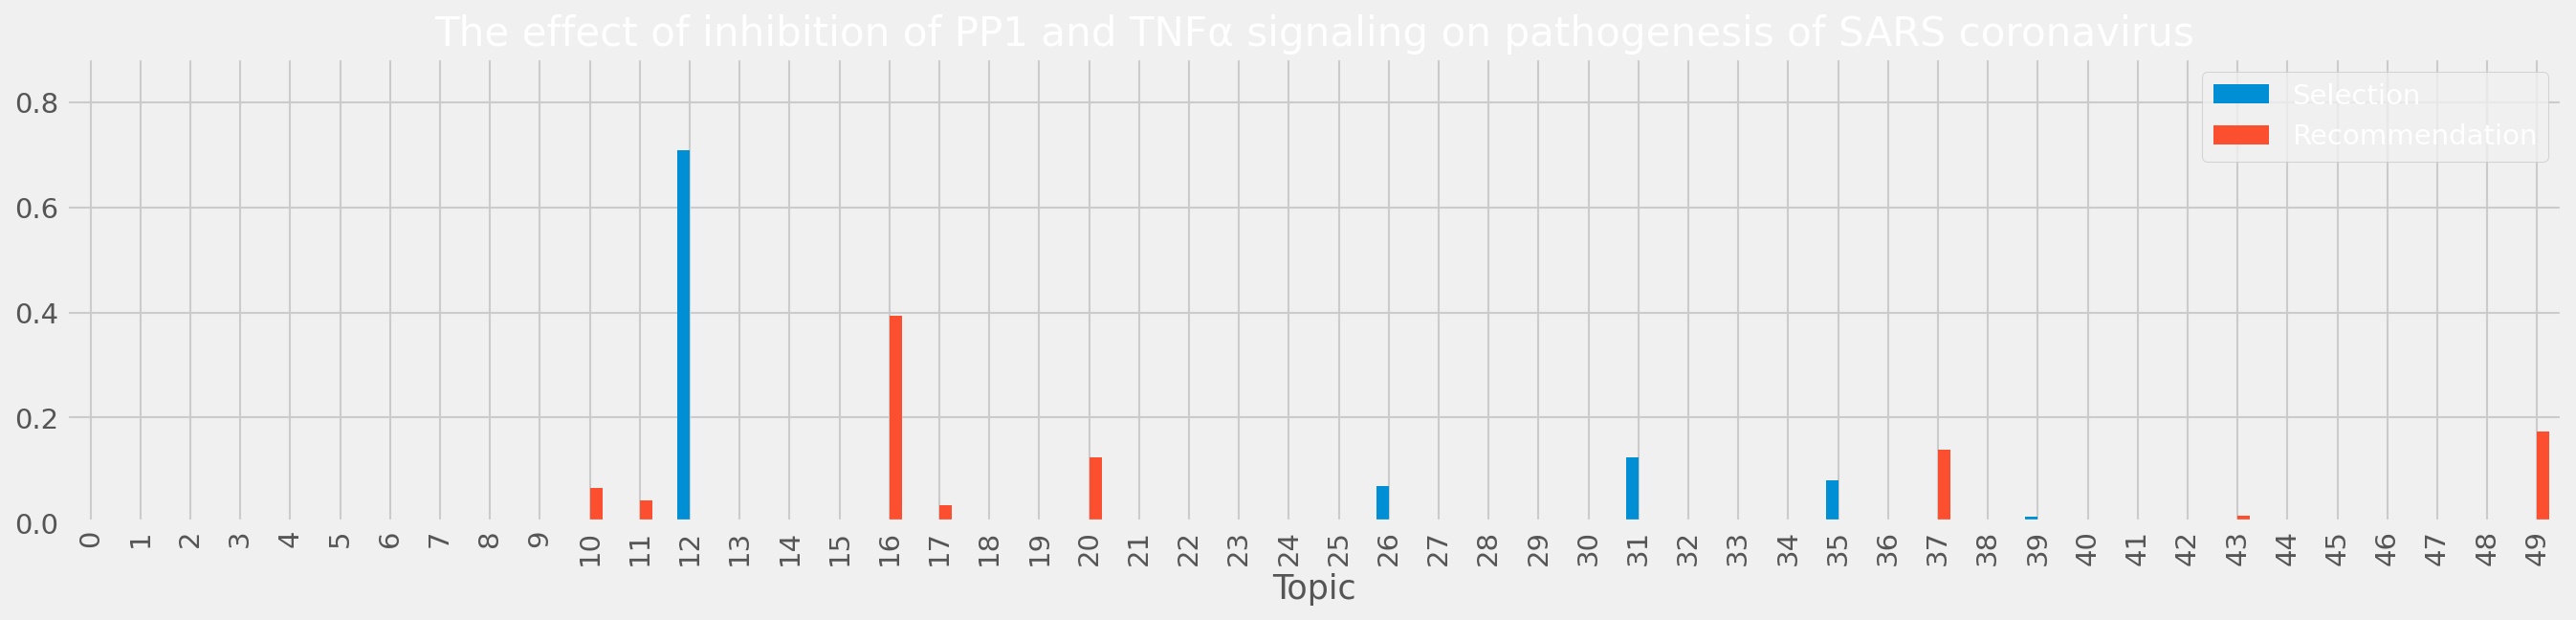

In [57]:
def plot_article_dna(paper_id, width=20):
    t = df[df.paper_id == paper_id].title.values[0]
    doc_topic_dist[df.paper_id == paper_id].T.plot(kind='bar', legend=None, title=t, figsize=(width, 4))
    plt.xlabel('Topic')

def compare_dnas(paper_id, recommendation_id, width=20):
    t = df[df.paper_id == recommendation_id].title.values[0]
    temp = doc_topic_dist[df.paper_id == paper_id]
    ymax = temp.max(axis=1).values[0]*1.25
    temp = pd.concat([temp, doc_topic_dist[df.paper_id == recommendation_id]])
    temp.T.plot(kind='bar', title=t, figsize=(width, 4), ylim= [0, ymax])
    plt.xlabel('Topic')
    plt.legend(['Selection', 'Recommendation'])

compare_dnas('90b5ecf991032f3918ad43b252e17d1171b4ea63', 'a137eb51461b4a4ed3980aa5b9cb2f2c1cf0292a')

In [58]:
def dna_tabs(paper_ids):
    k = len(paper_ids)
    outs = [widgets.Output() for i in range(k)]

    tab = widgets.Tab(children = outs)
    tab_titles = ['Paper ' + str(i+1) for i in range(k)]
    for i, t in enumerate(tab_titles):
        tab.set_title(i, t)
    display(tab)

    for i, t in enumerate(tab_titles):
        with outs[i]:
            ax = plot_article_dna(paper_ids[i])
            plt.show(ax)

def compare_tabs(paper_id, recommendation_ids):
    k = len(recommendation_ids)
    outs = [widgets.Output() for i in range(k)]

    tab = widgets.Tab(children = outs)
    tab_titles = ['Paper ' + str(i+1) for i in range(k)]
    for i, t in enumerate(tab_titles):
        tab.set_title(i, t)
    display(tab)

    for i, t in enumerate(tab_titles):
        with outs[i]:
            ax = compare_dnas(paper_id, recommendation_ids[i])
            plt.show(ax)

In [59]:
dna_tabs(['90b5ecf991032f3918ad43b252e17d1171b4ea63', 'a137eb51461b4a4ed3980aa5b9cb2f2c1cf0292a'])

In [60]:
compare_tabs('90b5ecf991032f3918ad43b252e17d1171b4ea63', ['90b5ecf991032f3918ad43b252e17d1171b4ea63', 'a137eb51461b4a4ed3980aa5b9cb2f2c1cf0292a'])

In [61]:
def recommendation(paper_id, k=5, lower=1950, upper=2020, only_covid19=False, plot_dna=False):
    '''
    Returns the title of the k papers that are closest (topic-wise) to the paper given by paper_id.
    '''
    
    print(df.title[df.paper_id == paper_id].values[0])

    recommended, dist = get_k_nearest_docs(doc_topic_dist[df.paper_id == paper_id].iloc[0], k, lower, upper, only_covid19, get_dist=True)
    recommended = df.iloc[recommended].copy()
    recommended['similarity'] = 1 - dist 
    
    h = '<br/>'.join(['<a href="' + l + '" target="_blank">'+ n + '</a>' +' (Similarity: ' + "{:.2f}".format(s) + ')' for l, n, s in recommended[['url','title', 'similarity']].values])
    display(z(h))
    
    if plot_dna:
        compare_tabs(paper_id, recommended.paper_id.values)

In [62]:
recommendation('a137eb51461b4a4ed3980aa5b9cb2f2c1cf0292a', k=5, plot_dna=True)

The effect of inhibition of PP1 and TNFα signaling on pathogenesis of SARS coronavirus


# Free text search

In [65]:
def relevant_articles(tasks, k=3, lower=1950, upper=2020, only_covid19=False):
    tasks = [tasks] if type(tasks) is str else tasks 
    
    tasks_vectorized = vectorizer.transform(tasks)
    tasks_topic_dist = pd.DataFrame(lda.transform(tasks_vectorized))

    for index, bullet in enumerate(tasks):
        print(bullet)
        recommended = get_k_nearest_docs(tasks_topic_dist.iloc[index], k, lower, upper, only_covid19)
        recommended = df.iloc[recommended]

        h = '<br/>'.join(['<a href="' + l + '" target="_blank">'+ n + '</a>' for l, n in recommended[['url','title']].values])
        display(HTML(h))

In [66]:
def relevant_articles_for_text():    
    textW = widgets.Textarea(
        value='',
        placeholder='Type something',
        description='',
        disabled=False,
        layout=Layout(width='90%', height='200px')
    )

    yearW = widgets.IntRangeSlider(min=1950, max=2020, value=[2010, 2020], description='Year Range', 
                               continuous_update=False, layout=Layout(width='40%'))
    covidW = widgets.Checkbox(value=True,description='Only COVID-19-Papers',disabled=False, indent=False, layout=Layout(width='25%'))
    kWidget = widgets.IntSlider(value=10, description='k', max=50, min=1, layout=Layout(width='25%'))

    button = widgets.Button(description="Search")

    display(VBox([HBox([kWidget, yearW, covidW], layout=Layout(width='90%', justify_content='space-around')),
        textW, button], layout=Layout(align_items='center')))

    def on_button_clicked(b):
        clear_output()
        display(VBox([HBox([kWidget, yearW, covidW], layout=Layout(width='90%', justify_content='space-around')),
            textW, button], layout=Layout(align_items='center')))        
        relevant_articles(textW.value, kWidget.value, yearW.value[0], yearW.value[1], covidW.value)

    button.on_click(on_button_clicked)

In [67]:
relevant_articles_for_text()

Vaccine for COVID-19
